<a href="https://colab.research.google.com/github/jeobmg24/golden_cashew24/blob/main/attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

Last lecture, we learned about the Attention mechanism. In this homework, we will implement the Attention algorithm and visualize the algorithm in action.

Attention is a mechanism that allows a neural network to focus on certain parts of an input sequence when producing an output.

For the purposes of this homework, we will be using the Attention Mechanism found in the "Bidirectional Encoder Representations from Transformers" model, or BERT for short. BERT is a model that was released in 2018 by Google. It is a model that is trained on a large corpus of text, and can be used for a variety of tasks, such as question answering and sentiment analysis. As you could imagine, this model has been trained to be very good at understanding the English language. This is thanks in part to the Attention Mechanism that was trained with and used in the model, which we will be analyzing in this homework.

## 0) Setup

Before we start, we first need a few things. To start, we will need to install some required packages.

`transformers` is the HuggingFace library that we will use throughout the course. It is a library that contains many pretrained models, including BERT which we will use in this homework, and APIs to easily interact with these models.

`torch`, or 'Pytorch', is a deep learning library that contains many useful functions for training neural networks. However, in this homework, we will use it for some mathematical operations.

`matplotlib` is a plotting library that we will use to visualize the Attention Mechanism.

Run the below cell to install these packages into your environment.

In [ ]:
!pip install transformers torch matplotlib

Now that we have the packages installed, we will need to import them. Run the below cell to import the packages.

In [3]:
from transformers import BertTokenizer, BertModel
import torch

Finally, we will download the BERT model. This make take some time, as the model is quite large and will need to be downloaded from the internet, so make sure you have enough space on your machine and a good internet connection.

We have also defined a utility function for use later in the homework.

Run the below cell to download the BERT model.

In [4]:
# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def process_input(txt: str, l = 0):
    input_ids = tokenizer.encode(txt, return_tensors='pt')

    # Get the embeddings from the input_ids
    embeddings = model.embeddings(input_ids)

    # flatten to 2 dimensions
    embeddings = embeddings.squeeze(0)

    Q = model.encoder.layer[l].attention.self.query(embeddings)
    K = model.encoder.layer[l].attention.self.key(embeddings)
    V = model.encoder.layer[l].attention.self.value(embeddings)

    return Q, K, V, input_ids

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## 1) Attention Score Calculation (5 pts)

Recall in class that we learned about the Attention mechanism. The Attention mechanism is an algorithm for a model to learn which parts of the input are important.
It is defined as follows:

$$
\begin{align}
\text{Attention}(Q, K, V) &= \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
\end{align}
$$

$$
\begin{align}
\text{where } Q \in \mathbb{R}^{n \times d_k},
K \in \mathbb{R}^{n \times d_k},
V \in \mathbb{R}^{n \times d_v}
\end{align}
$$

As the Query, Key, and Value matrices depend on trained weights, we will be using the matrices from a BERT model.
This extraction has been done for you in the `process_input` function. We have also provided the 'dk' of the BERT model for you.

In this question, we will complete the `generate_attention_scores` function, which will compute the attention scores for the input. We will then compute the attention scores for the input sentence `the cat scratched its ear`, or what words BERT thinks are important to other words, and use the result for the next question.

You will implement `attention_scores` which will compute the attention scores for the input.

Functions you will need to implement this are:  

| Function | Description |
| :------------- | :------------- |
| `torch.matmul(mat1, mat2)` | Performs matrix multiplication of mat1 and mat2 |
| `torch.transpose(mat, 0, 1)` | Transposes the matrix mat (0 and 1 are the dimensions to transpose) |
| `torch.sqrt(x)` | Computes the square root of x |
| `torch.softmax(mat, dim = 0)` | Computes the softmax of the matrix mat, along each row (dim = 0) |


NOTE: As we are attempting to visualize the attention scores themselves, the Value matrix is not needed.

In [5]:
def generate_attention_scores(sentence: str):
    # Define the input sentence and encode it
    Q, K, V, input_ids = process_input(sentence)

    dk = torch.tensor(Q.shape[-1])

    # TODO: Write the equation to compute the attention scores
    attention_scores = (torch.matmul(Q, torch.transpose(K, 0, 1))/ torch.sqrt(dk))
    attention_scores = torch.softmax(attention_scores, dim=0)

    return attention_scores, input_ids


attention_scores, input_ids = generate_attention_scores("The cat scratched its ear")

To verify that your equation generates an attention matrix with the correct dimensions, run the below cell. If your implementation fails, you will get an AssertionError.

In [6]:
assert attention_scores.shape == torch.Size([len(input_ids[0]), len(input_ids[0])])

## 2) Analysis of Examples (5 pts)

Now that we can compute the attention scores, we can visualize them. Run the below cell to visualize the attention scores for the input sentence `the cat scratched its ear`.

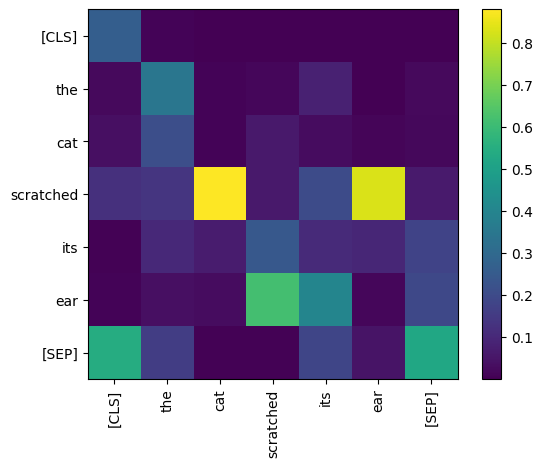

In [7]:
import matplotlib.pyplot as plt

def plot_attention(attention_scores, input_ids):
    plt.imshow(attention_scores.detach().numpy())

    # Show token at each tick
    tokens_back = tokenizer.convert_ids_to_tokens(input_ids[0])
    tokens = [token.replace("▁", "") for token in tokens_back]
    plt.xticks(range(len(tokens)), tokens, rotation=90)
    plt.yticks(range(len(tokens)), tokens)

    # Add colorbar
    plt.colorbar()

    plt.show()

plot_attention(attention_scores, input_ids)

You should see a heatmap between each word in the sentence, with a colorbar key on the right. The colorbar key shows the attention score. The higher the attention score, the more important BERT thinks the word is to the other word.

For example, the attention score between `scratched` and `cat` should appear to be a high attention score. This makes sense intuitively, as in the sentence, the noun `cat` is the one doing the action of `scratched`.

In [8]:
# TODO: Complete the following

# What are the highest two words for 'scratched'? (The first, 'cat' is given for you)
scratched = ['cat', 'ear']

For another example, we will look at the attention scores for the sentence `The man hopped over the fence`. Run the below cell to visualize the attention scores for this sentence, and then answer the following questions.

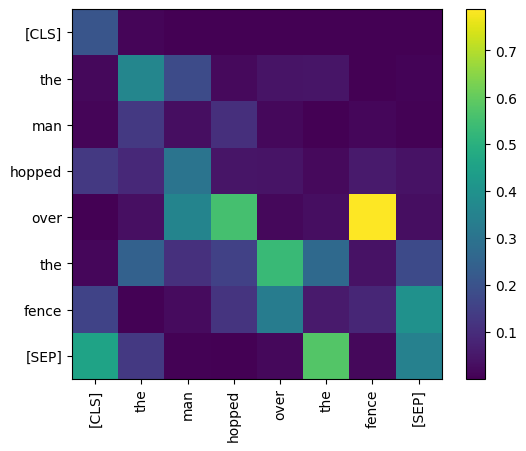

In [9]:
att_score, inp_id = generate_attention_scores("The man hopped over the fence")
plot_attention(att_score, inp_id)

In [10]:
# TODO: Complete the following

# What are the highest two words for 'man'?
man = ['the', 'hopped']

# What is the highest word for 'hopped'?
hopped = ['man']

# What are the highest two words for 'over'?
over = ['fence', 'hopped']

## 3) Analysis of Your Own Sentence (2 pts)

Now that we have seen some examples of how BERT attends to words, you will now analyse your own sentence.

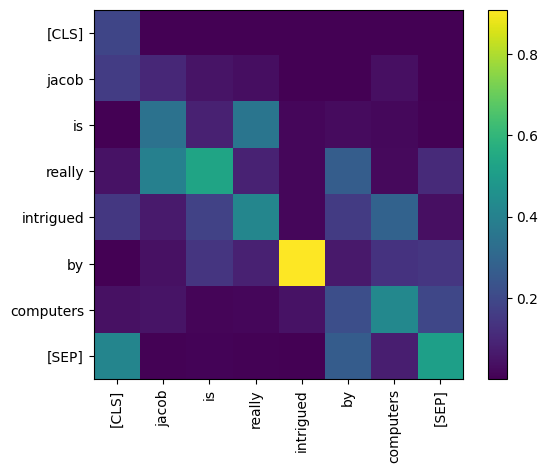

In [12]:
# TODO: Enter your custom sentence in the 'your_sentence' variable below, and then run the cell

your_sentence = "Jacob is really intrigued by computers"
att_score, inp_id = generate_attention_scores(your_sentence)
plot_attention(att_score, inp_id)

In [13]:
# TODO:
# Write a brief description of what you see in the attention scores. Highlight any interesting observations, such as words that have high attention scores,
# and explain why the model might have assigned high attention scores to those pair of words.

'''
In the sentence that I inputted, I have noticed that by has a very high attention score with the word intrigued. This is probably because intrigued is the only adjective
in the sentence that descibes how Jacob feels and 'by' is the adverb that helps tie the sentence together


'''

"\nIn the sentence that I inputted, I have noticed that by has a very high attention score with the word intrigued. This is probably because intrigued is the only adjective\nin the sentence that descibes how Jacob feels and 'by' is the adverb that helps tie the sentence together \n\n\n"

You've reached the end of Homework 1. Please save your notebook and submit it to Github Classroom.

Hopefully you've gained a deeper understanding of the Attention mechanism and how it works. If you have any questions, please feel free to ask in the Discord.